In [3]:
from music21 import *

%load_ext music21.ipython21

def showNotes(clock, major_generator, minor_generator, result):

    #TS = str(int(len(clock))) +'/'+ str(int((clock[0].duration.quarterLength*16)))
    TS = '8/1'
    #print(TS)
    s = stream.Score(id='mainScore')
    p0 = stream.Part(id='part0')
    p1 = stream.Part(id='part1')
    p2 = stream.Part(id='part2')
    p3 = stream.Part(id='part3')

    p0.timeSignature = meter.TimeSignature(TS)
    p1.timeSignature = meter.TimeSignature(TS)
    p2.timeSignature = meter.TimeSignature(TS)
    p3.timeSignature = meter.TimeSignature(TS)

    p0.append(clock)
    p1.append(major_generator)
    p2.append(minor_generator)
    p3.append(result)
    s.insert(0, p0)
    s.insert(0, p1)
    s.insert(0, p2)
    s.insert(0, p3)

    # stream2.show('text')
    # stream2.show('midi')
    return s

def schillinger_type_I(major, minor, divider):

    length = major  * minor
    temp_array = []

    clock_notes = []
    for i in range(length):
        nota = pitch.Pitch("C")
        nota.octave = 4
        nota = note.Note(nota.nameWithOctave)
        nota.duration.quarterLength = 1/divider
        clock_notes.append(nota)
        temp_array.append(False)
        #print(i)

    major_notes = []
    for i in range(0,length,major):
        nota = pitch.Pitch("C")
        nota.octave = 4
        nota = note.Note(nota.nameWithOctave)
        nota.duration.quarterLength = major/divider
        major_notes.append(nota)
        temp_array[i] = True
        #print(i)

    minor_notes = []
    for i in range(0,length,minor):
        nota = pitch.Pitch("C")
        nota.octave = 4
        nota = note.Note(nota.nameWithOctave)
        nota.duration.quarterLength = minor/divider
        minor_notes.append(nota)
        temp_array[i] = True
        #print(i)





    result_notes = []
    i = 0
    while i < len(temp_array):
        note_lenght = 1
        if temp_array[i] == True:
            for l in range(i, len(temp_array)):
                if temp_array[(l+1)%len(temp_array)] != True:
                    note_lenght += 1
                    i += 1
                else:
                    break
        print(note_lenght)
        nota = pitch.Pitch("C")
        nota.octave = 4
        nota = note.Note(nota.nameWithOctave)
        nota.duration.quarterLength = note_lenght/divider
        result_notes.append(nota)
        i+=1
        #print(temp_array)

    return showNotes(clock_notes,major_notes, minor_notes, result_notes)

3
1
2
2
1
3


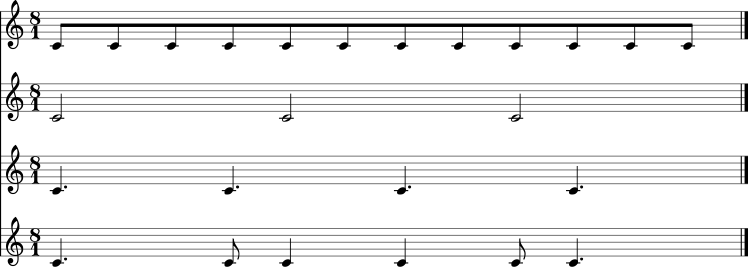

In [4]:
score = schillinger_type_I(4, 3, 2) # (major, minor,divider)
score.show()